In [1]:
import csv
import numpy as np, matplotlib.pyplot as plt
from PhyPraKit import readPicoScope, resample
from scipy import signal
from scipy import interpolate
import sys

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate

Welcome to JupyROOT 6.24/06


In [3]:
#Aufgabe 2.5

In [4]:
P = (8.8**2)/(4*590)
print(P)

0.032813559322033906


In [5]:
data = np.genfromtxt( "Aufgabe2_3.csv", 
                      delimiter=",", 
                      skip_header=3 )
f = data[:,0]
U = data[:,1]
delta_t = data[:,2]

In [6]:
np.round(U,4)

array([0.0097, 0.0143, 0.0218, 0.0506, 0.066 , 0.0911, 0.1394, 0.1948,
       0.1642, 0.1149, 0.0812, 0.0638, 0.0382, 0.0251, 0.0189, 0.0153,
       0.0129, 0.0113, 0.0101, 0.0091, 0.0083, 0.0076])

In [7]:
print(delta_t)
delta_t_cor=delta_t*10**(-3)
print(delta_t_cor)

[ 2.2   1.8   1.6   1.2   1.05  0.9   0.58  0.   -0.5  -0.9  -0.9  -1.
 -1.1  -1.1  -1.1  -1.1  -1.1  -1.1  -1.1  -1.1  -1.1  -1.1 ]
[ 0.0022   0.0018   0.0016   0.0012   0.00105  0.0009   0.00058  0.
 -0.0005  -0.0009  -0.0009  -0.001   -0.0011  -0.0011  -0.0011  -0.0011
 -0.0011  -0.0011  -0.0011  -0.0011  -0.0011  -0.0011 ]


In [8]:
delta_phi=2*np.pi*f*delta_t_cor
print(np.round(delta_phi,4))
print(max(U))

[ 1.3823  1.3572  1.4074  1.2441  1.1215  0.9896  0.656   0.     -0.5969
 -1.1027 -1.131  -1.2881 -1.5205 -1.6588 -1.797  -1.9352 -2.0735 -2.2117
 -2.3499 -2.4881 -2.6264 -2.7646]
0.19482


/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


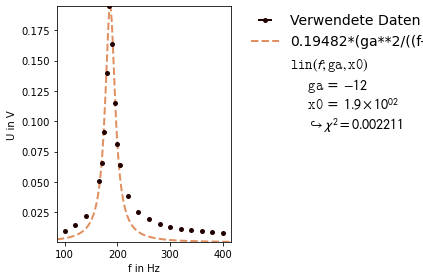

In [9]:
def lin(f,ga=10000,x0=185):
    return 0.19482*(ga**2/((f-x0)**2+ga**2))

xy_data = XYContainer(f,U)

line_fit=Fit(data=xy_data,model_function=lin)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='r', a='a', b='U/I^2')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} ")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='r', a='a', b='\frac{U}{I^2}')
#line_fit.assign_model_function_latex_name('\frac{U}{I^2}')
#line_fit.assign_model_function_latex_expression('{a} \\cdot {x}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "0.19482*(ga**2/((f-x0)**2+ga**2))"

line_fit.data_container.axis_labels = [ "f in Hz","U in V"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save('Resonanzkurve_2_3')

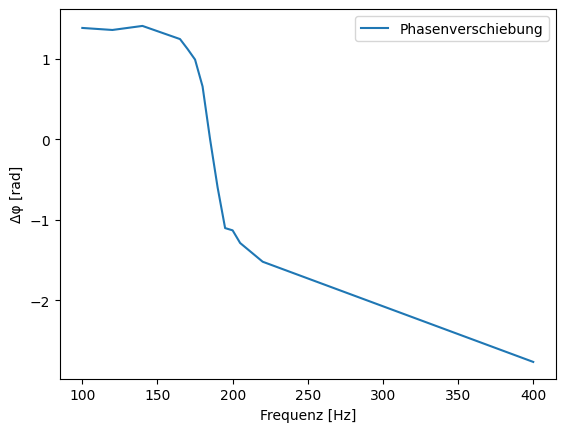

0.19482


In [25]:
plt.plot(f,delta_phi,label='Phasenverschiebung')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Δφ [rad]')
plt.legend()
plt.show()
print(max(U))

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


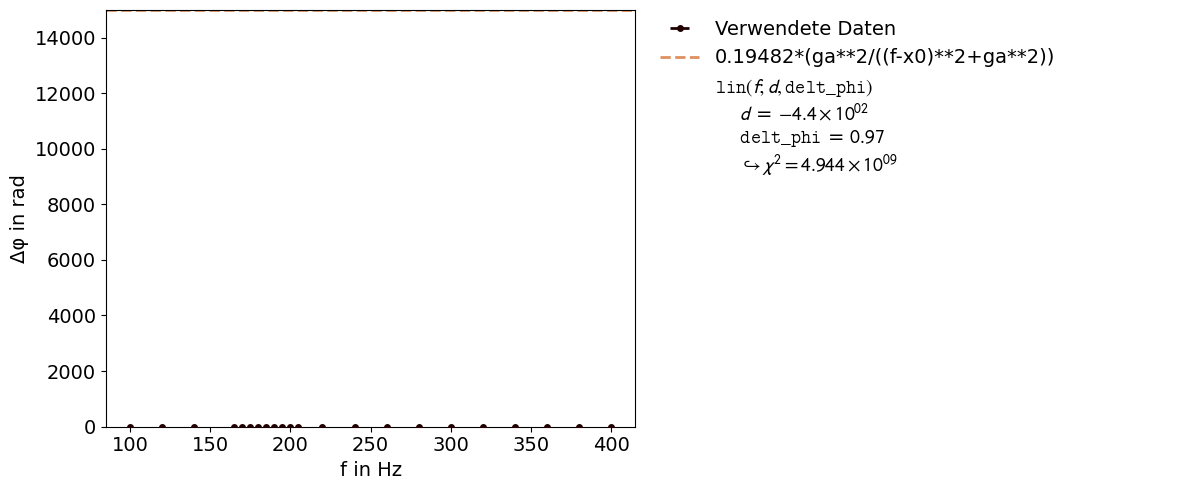

In [24]:
def lin(f,d=100,delt_phi=1):
    return 1/(4*np.pi)*d*1/np.tan(delt_phi)+np.sqrt((2*np.pi*1193.8)**2*4+4*d**2*1/np.tan(delt_phi)**2)

xy_data = XYContainer(f,delta_phi)

line_fit=Fit(data=xy_data,model_function=lin)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='r', a='a', b='U/I^2')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} ")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='r', a='a', b='\frac{U}{I^2}')
#line_fit.assign_model_function_latex_name('\frac{U}{I^2}')
#line_fit.assign_model_function_latex_expression('{a} \\cdot {x}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "0.19482*(ga**2/((f-x0)**2+ga**2))"

line_fit.data_container.axis_labels = [ "f in Hz","Δφ in rad"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save('Resonanzkurve_2_3')

In [11]:
#Aufgabe2.2


In [12]:
U_w=0.0717 
U_g=0.2005 
U_s=0.1708 
R_w=110

In [13]:
R_s=R_w*(U_g**2-U_s**2-U_w**2)/(2*U_w**2)
print(R_s)

62.97928957826371


In [14]:
I=U_w/R_w

In [15]:
U_rs=R_s*I
print(U_rs)

0.041051046025104614


In [16]:
L=np.sqrt(U_s**2-U_rs**2)/(2*np.pi*30*U_w)*R_w
print(L)

1.3493967051780347
